<a href="https://colab.research.google.com/github/jthetzel/BloodClinicServer/blob/master/chapter05_fundamentals_of_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Under and over fitting

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))],
    axis=1
)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))],
    axis=1
)

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 784)

In [3]:
train_labels.shape

(60000,)

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])
  model.compile(
      optimizer="rmsprop",
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
  )
  
  return model

In [5]:
model = get_model()

history_noise = model.fit(
    train_images_with_noise_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 4s 4ms/step - loss: 0.6294 - accuracy: 0.8104 - val_loss: 0.2957 - val_accuracy: 0.9094
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.9230 - val_loss: 0.2027 - val_accuracy: 0.9367
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1630 - accuracy: 0.9495 - val_loss: 0.1519 - val_accuracy: 0.9552
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1138 - accuracy: 0.9649 - val_loss: 0.1352 - val_accuracy: 0.9603
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9739 - val_loss: 0.1210 - val_accuracy: 0.9672
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9798 - val_loss: 0.1299 - val_accuracy: 0.9630
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.1749 - val_accuracy: 0.9498
Epoch 

In [6]:
model = get_model()

history_zeros = model.fit(
    train_images_with_zeros_channels,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.2889 - accuracy: 0.9162 - val_loss: 0.1461 - val_accuracy: 0.9587
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1196 - accuracy: 0.9648 - val_loss: 0.1069 - val_accuracy: 0.9679
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9763 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0564 - accuracy: 0.9830 - val_loss: 0.0851 - val_accuracy: 0.9768
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0429 - accuracy: 0.9873 - val_loss: 0.0821 - val_accuracy: 0.9749
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0818 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0237 - accuracy: 0.9933 - val_loss: 0.0868 - val_accuracy: 0.9769
Epoch 

## Plotting accuracy

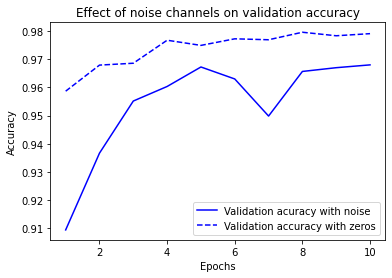

In [7]:
import matplotlib.pyplot as plt

val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]

epochs = range(1, 11)

plt.plot(epochs, val_acc_noise, "b-", label="Validation acuracy with noise")
plt.plot(epochs, val_acc_zeros, "b--", label="Validation accuracy with zeros")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

## Generalization in deep learning

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
  layers.Dense(512, activation="relu"),
  layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images,
    random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/100
375/375 [==============================] - 2s 3ms/step - loss: 2.3176 - accuracy: 0.1034 - val_loss: 2.3095 - val_accuracy: 0.1019
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.3001 - accuracy: 0.1142 - val_loss: 2.3112 - val_accuracy: 0.1077
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2923 - accuracy: 0.1258 - val_loss: 2.3211 - val_accuracy: 0.0990
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2790 - accuracy: 0.1406 - val_loss: 2.3265 - val_accuracy: 0.0993
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2615 - accuracy: 0.1521 - val_loss: 2.3375 - val_accuracy: 0.0999
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2410 - accuracy: 0.1671 - val_loss: 2.3571 - val_accuracy: 0.0980
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2172 - accuracy: 0.1811 - val_loss: 2.3651 - val_accuracy: 0.0978

In [9]:
!nvidia-smi

Mon Apr  4 13:28:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    34W / 250W |   1475MiB / 16280MiB |      8%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Tuning gradient descent parameters

In [10]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer=keras.optimizers.RMSprop(1.),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(
    train_images,
    train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 715.3451 - accuracy: 0.3930 - val_loss: 6.7103 - val_accuracy: 0.3370
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 4.9527 - accuracy: 0.2757 - val_loss: 3.6615 - val_accuracy: 0.2855
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8329 - accuracy: 0.2682 - val_loss: 2.3242 - val_accuracy: 0.2438
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.8885 - accuracy: 0.2709 - val_loss: 2.4760 - val_accuracy: 0.3111
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.9129 - accuracy: 0.2722 - val_loss: 2.1915 - val_accuracy: 0.2968
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7574 - accuracy: 0.2734 - val_loss: 2.0259 - val_accuracy: 0.2615
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7447 - accuracy: 0.2814 - val_loss: 2.1172 - val_accuracy: 0.3157
Epoc

In [11]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 3ms/step - loss: 0.3993 - accuracy: 0.9089 - val_loss: 0.1411 - val_accuracy: 0.9600
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1424 - accuracy: 0.9625 - val_loss: 0.1683 - val_accuracy: 0.9620
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1151 - accuracy: 0.9717 - val_loss: 0.1772 - val_accuracy: 0.9657
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9781 - val_loss: 0.1984 - val_accuracy: 0.9653
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0926 - accuracy: 0.9811 - val_loss: 0.1994 - val_accuracy: 0.9732
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0832 - accuracy: 0.9844 - val_loss: 0.2116 - val_accuracy: 0.9724
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0666 - accuracy: 0.9868 - val_loss: 0.2837 - val_accuracy: 0.9725
Epoch 

## Incresaing model capacity

In [12]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6719 - accuracy: 0.8357 - val_loss: 0.3571 - val_accuracy: 0.9059
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3507 - accuracy: 0.9041 - val_loss: 0.3080 - val_accuracy: 0.9146
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3152 - accuracy: 0.9122 - val_loss: 0.2880 - val_accuracy: 0.9193
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2989 - accuracy: 0.9170 - val_loss: 0.2797 - val_accuracy: 0.9223
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2898 - accuracy: 0.9195 - val_loss: 0.2750 - val_accuracy: 0.9241
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2831 - accuracy: 0.9209 - val_loss: 0.2709 - val_accuracy: 0.9252
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2782 - accuracy: 0.9223 - val_loss: 0.2682 - val_accuracy: 0.9268
Epoch 

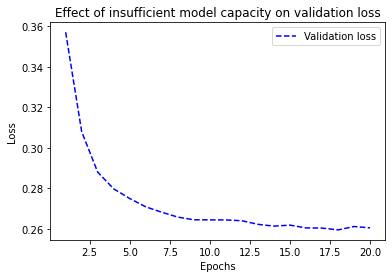

In [13]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [14]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.3523 - accuracy: 0.9001 - val_loss: 0.1789 - val_accuracy: 0.9476
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1650 - accuracy: 0.9512 - val_loss: 0.1705 - val_accuracy: 0.9495
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9646 - val_loss: 0.1154 - val_accuracy: 0.9658
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0899 - accuracy: 0.9726 - val_loss: 0.1089 - val_accuracy: 0.9657
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0713 - accuracy: 0.9780 - val_loss: 0.1044 - val_accuracy: 0.9690
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0576 - accuracy: 0.9828 - val_loss: 0.0947 - val_accuracy: 0.9734
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0936 - val_accuracy: 0.9733
Epoch 

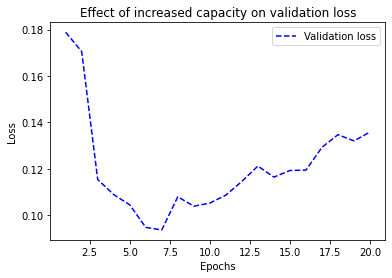

In [15]:
import matplotlib.pyplot as plt
val_loss = history_large_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of increased capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## Reducing network size

In [16]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17473536/17464789 [==============================] - 0s 0us/step
Epoch 1/20
30/30 [==============================] - 2s 39ms/step - loss: 0.5164 - accuracy: 0.7800 - val_loss: 0.3901 - val_accuracy: 0.8690
Epoch 2/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3071 - accuracy: 0.9027 - val_loss: 0.3038 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2264 - accuracy: 0.9265 - val_loss: 0.2965 - val_accuracy: 0.8789
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1793 - accuracy: 0.9417 - val_loss: 0.2724 - val_accuracy: 0.8933
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1449 - accuracy: 0.9547 - val_loss: 0.2839 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1225 - accuracy: 0.9636 - val_loss: 0.3102 - val_accuracy: 0.8797
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1017 - accurac

In [17]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.5945 - accuracy: 0.7810 - val_loss: 0.5179 - val_accuracy: 0.8412
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4472 - accuracy: 0.8807 - val_loss: 0.4173 - val_accuracy: 0.8749
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3543 - accuracy: 0.9043 - val_loss: 0.3556 - val_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2902 - accuracy: 0.9190 - val_loss: 0.3178 - val_accuracy: 0.8865
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2450 - accuracy: 0.9297 - val_loss: 0.2967 - val_accuracy: 0.8904
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2113 - accuracy: 0.9385 - val_loss: 0.2827 - val_accuracy: 0.8933
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.1852 - accuracy: 0.9451 - val_loss: 0.2759 - val_accuracy: 0.8931
Epoch 8/20
30

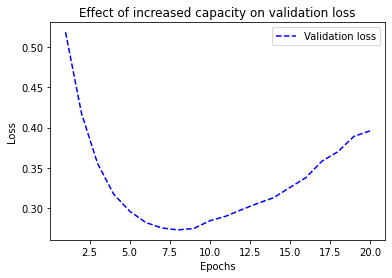

In [19]:
import matplotlib.pyplot as plt
val_loss = history_smaller_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of increased capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5266 - accuracy: 0.7582 - val_loss: 0.4456 - val_accuracy: 0.7868
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2473 - accuracy: 0.8998 - val_loss: 0.2810 - val_accuracy: 0.8796
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1478 - accuracy: 0.9464 - val_loss: 0.3027 - val_accuracy: 0.8912
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0853 - accuracy: 0.9727 - val_loss: 0.3689 - val_accuracy: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0973 - accuracy: 0.9784 - val_loss: 0.3380 - val_accuracy: 0.8879
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0061 - accuracy: 0.9995 - val_loss: 0.5236 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.6147 - val_accuracy: 0.8874
Epoch 8/20
30

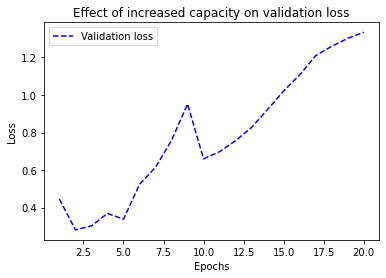

In [20]:
import matplotlib.pyplot as plt
val_loss = history_larger_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of increased capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

## L2 weight regularization

In [26]:
from tensorflow.keras import regularizers

model = keras.Sequential([
  layers.Dense(
      16,
      kernel_regularizer=regularizers.l2(0.002),
      activation="relu"
  ),
  layers.Dense(
      16,
      kernel_regularizer=regularizers.l2(0.002),
      activation="relu"
  ),
  layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_l2_reg = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.5951 - accuracy: 0.7883 - val_loss: 0.4985 - val_accuracy: 0.8297
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4033 - accuracy: 0.8925 - val_loss: 0.3907 - val_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3363 - accuracy: 0.9135 - val_loss: 0.3949 - val_accuracy: 0.8703
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3010 - accuracy: 0.9228 - val_loss: 0.3563 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2786 - accuracy: 0.9322 - val_loss: 0.3687 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2638 - accuracy: 0.9382 - val_loss: 0.4131 - val_accuracy: 0.8646
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2536 - accuracy: 0.9414 - val_loss: 0.3693 - val_accuracy: 0.8821
Epoch 8/20
30

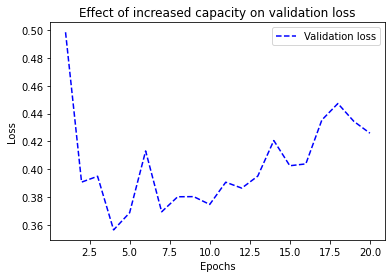

In [27]:
import matplotlib.pyplot as plt
val_loss = history_l2_reg.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of increased capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [28]:
from tensorflow.keras import regularizers

regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [30]:
model = keras.Sequential([
  layers.Dense(16, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(16, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

history_dropout = model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_split=0.4
)

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6550 - accuracy: 0.6007 - val_loss: 0.5778 - val_accuracy: 0.7992
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5546 - accuracy: 0.7283 - val_loss: 0.4615 - val_accuracy: 0.8528
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4667 - accuracy: 0.7991 - val_loss: 0.3664 - val_accuracy: 0.8803
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3975 - accuracy: 0.8429 - val_loss: 0.3274 - val_accuracy: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.3390 - accuracy: 0.8794 - val_loss: 0.2914 - val_accuracy: 0.8916
Epoch 6/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2936 - accuracy: 0.9031 - val_loss: 0.2784 - val_accuracy: 0.8911
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - loss: 0.2535 - accuracy: 0.9164 - val_loss: 0.3007 - val_accuracy: 0.8835
Epoch 8/20
30

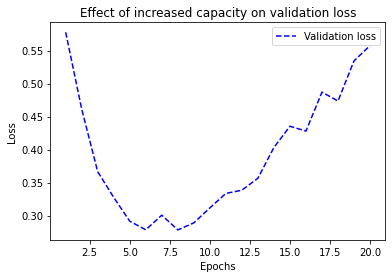

In [31]:
import matplotlib.pyplot as plt
val_loss = history_dropout.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of increased capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()